In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import string

In [70]:
df=pd.read_csv("spam.csv",encoding='latin-1')

In [71]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [72]:
df.shape

(5572, 5)

# Data Cleaning

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [74]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [75]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [76]:
v1_encode={"ham":0,"spam":1}
df["v1_encode"]=df.v1.map(v1_encode)


In [77]:
df.head()

,v1,v2,v1_encode
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [78]:
df.drop(columns=["v1"],inplace=True)

In [79]:
df.isnull().sum()

v2           0
v1_encode    0
dtype: int64

In [80]:
df.duplicated().sum()

403

In [81]:
df=df.drop_duplicates(keep="first")

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   v2         5169 non-null   object
 1   v1_encode  5169 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


# Exploratory Data Analysis

In [83]:
df["v1_encode"].value_counts()

0    4516
1     653
Name: v1_encode, dtype: int64

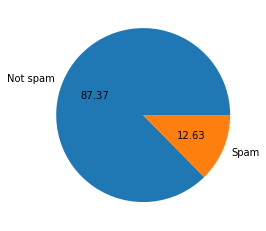

In [84]:
plt.pie(df['v1_encode'].value_counts(),labels=["Not spam","Spam"],autopct="%0.2f")
plt.show()

In [85]:
import nltk

In [86]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [87]:
## Counting no.of alphabets and storing then in new variable

df["count_alpha"]=df["v2"].apply(len)

In [88]:
df.head()

,v2,v1_encode,count_alpha
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


In [89]:
## Counting no.of words and storing then in new variable

df["count_words"]=df["v2"].apply(lambda x:len(nltk.word_tokenize(x)))

In [90]:
df.head()

,v2,v1_encode,count_alpha,count_words
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,U dun say so early hor... U c already then say...,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [91]:
## Counting no.of sentence and storing then in new variable

df["count_sentance"]=df["v2"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [92]:
df.head()

,v2,v1_encode,count_alpha,count_words,count_sentance
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


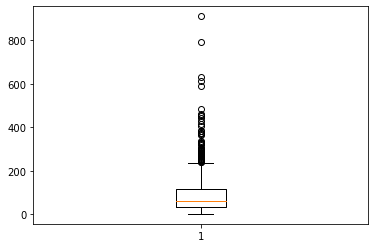

In [93]:
plt.boxplot(df["count_alpha"])
plt.show()

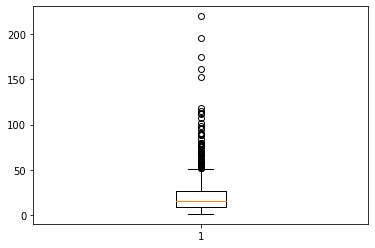

In [94]:
plt.boxplot(df["count_words"])
plt.show()

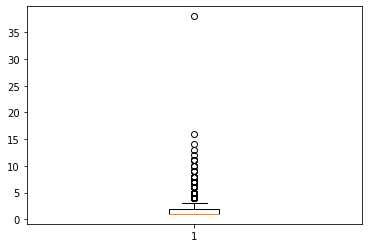

In [95]:
plt.boxplot(df["count_sentance"])
plt.show()

In [96]:
df.head()

,v2,v1_encode,count_alpha,count_words,count_sentance
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


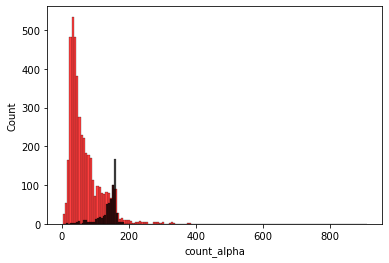

In [97]:
## Histogram for HAM and SPAM massages

sns.histplot(df[df["v1_encode"]==0]["count_alpha"],color="red")
sns.histplot(df[df["v1_encode"]==1]["count_alpha"],color="black")
plt.show()

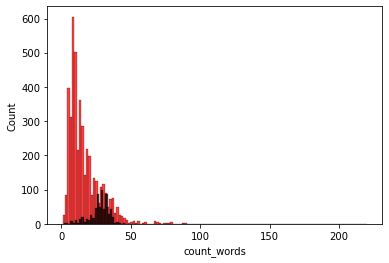

In [98]:
sns.histplot(df[df["v1_encode"]==0]["count_words"],color="red")
sns.histplot(df[df["v1_encode"]==1]["count_words"],color="black")
plt.show()

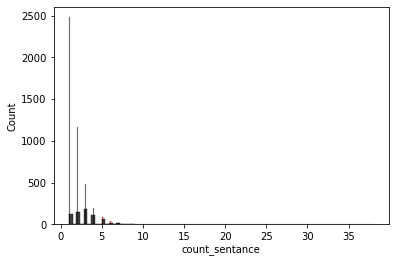

In [99]:
sns.histplot(df[df["v1_encode"]==0]["count_sentance"],color="red")
sns.histplot(df[df["v1_encode"]==1]["count_sentance"],color="black")
plt.show()

# Getting the co-relation

<AxesSubplot:>

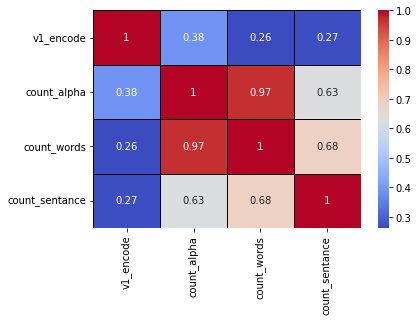

In [100]:
sns.heatmap(df.corr(),annot=True,linewidth=1,cmap="coolwarm",linecolor='k')

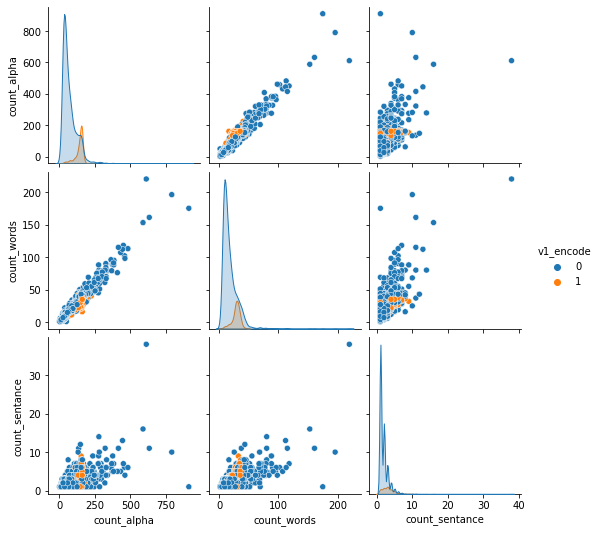

In [101]:
sns.pairplot(df,hue="v1_encode")
plt.show()

In [102]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [103]:
def clean_masg(masg):
    masg=masg.lower()
    text=nltk.word_tokenize(masg)
    clean_masg=[]
    for word in text:
        if word.isalnum():
          clean_masg.append(word)
    masg=clean_masg[:]
    clean_masg.clear()
    for word in masg:
        if word not in stopwords.words('english') and word not in string.punctuation:
            clean_masg.append(word)
    masg=clean_masg[:]
    clean_masg.clear()
    for word in masg:
        clean_masg.append(ps.stem(word))
        
            
    return " ".join(clean_masg)

In [104]:
df["cleaned_massage"]=df['v2'].apply(clean_masg)

In [105]:
df.head()

,v2,v1_encode,count_alpha,count_words,count_sentance,cleaned_massage
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [106]:
df.drop(columns=["v2"],inplace=True)
df.head()

,v1_encode,count_alpha,count_words,count_sentance,cleaned_massage
0,0,111,24,2,go jurong point crazi avail bugi n great world...
1,0,29,8,2,ok lar joke wif u oni
2,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,49,13,1,u dun say earli hor u c alreadi say
4,0,61,15,1,nah think goe usf live around though


# Getting top words in HAM and SPAM using repeatedly

In [107]:
lst=df[df['v1_encode']==1]["cleaned_massage"].tolist()

In [108]:
lst

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [109]:
spam_words=[]
for i in lst:
    for word in i.split():
        spam_words.append(word)

In [110]:
len(spam_words)

9939

# MODEL BUILDING

In [111]:
# Converiting text into numerical or vecterising 

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer()

In [113]:
X=cv.fit_transform(df['cleaned_massage']).toarray()
X.shape

(5169, 6708)

In [114]:
Y=df['v1_encode'].values
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
print(x_train.shape,
x_test.shape,
y_train.shape,
y_test.shape)

(4135, 6708) (1034, 6708) (4135,) (1034,)


In [117]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [123]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X=scale.fit_transform(X)

In [118]:
"""gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))"""

'gnb.fit(x_train,y_train)\ny_pred1=gnb.predict(x_test)\nprint(accuracy_score(y_test,y_pred1))\nprint(confusion_matrix(y_test,y_pred1))\nprint(precision_score(y_test,y_pred1))'

In [124]:
mnb.fit(x_train,y_train)
y_pred1=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))

0.971953578336557


In [125]:
print(confusion_matrix(y_test,y_pred1))

[[901   0]
 [ 29 104]]


In [126]:
print(precision_score(y_test,y_pred1))

1.0


In [122]:
"""bnb.fit(x_train,y_train)
y_pred1=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))"""

'bnb.fit(x_train,y_train)\ny_pred1=bnb.predict(x_test)\nprint(accuracy_score(y_test,y_pred1))\nprint(confusion_matrix(y_test,y_pred1))\nprint(precision_score(y_test,y_pred1))'

In [129]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [1]:
install tenserflow 2.0


SyntaxError: invalid syntax (Temp/ipykernel_9560/153649173.py, line 1)

In [ ]:
import tensorflow